In [1]:
print("Hello")

Hello


In [9]:
!python mains.py train --dataset_name 'Chikusei' --colors 8 --n_blocks 3 --epochs 20 --batch_size 32 --n_subs 8 --n_ovls 2 --n_feats 512 --n_scale 8 --gpus "0,1"


0,1
Start seed:  3000
===> Loading datasets
./dataset/Chikusei_x8/trains/
./dataset/Chikusei_x8/trains/
./dataset/Chikusei_x8/trains/train
./dataset/Chikusei_x8/evals/
./dataset/Chikusei_x8/evals/evals
===> Building model for 8 bands
===> Setting optimizer and logger
===> Start training
Start epoch 1, learning rate = 0.0001
===> Thu Oct 26 17:08:25 2023 B3 Sub8 Fea512 GPU0,1	Epoch[1](1/780): Loss: 0.292601
===> Thu Oct 26 17:08:29 2023 B3 Sub8 Fea512 GPU0,1	Epoch[1](51/780): Loss: 0.029559
===> Thu Oct 26 17:08:34 2023 B3 Sub8 Fea512 GPU0,1	Epoch[1](101/780): Loss: 0.021521
===> Thu Oct 26 17:08:39 2023 B3 Sub8 Fea512 GPU0,1	Epoch[1](151/780): Loss: 0.023872
===> Thu Oct 26 17:08:43 2023 B3 Sub8 Fea512 GPU0,1	Epoch[1](201/780): Loss: 0.024047
===> Thu Oct 26 17:08:48 2023 B3 Sub8 Fea512 GPU0,1	Epoch[1](251/780): Loss: 0.022573
===> Thu Oct 26 17:08:53 2023 B3 Sub8 Fea512 GPU0,1	Epoch[1](301/780): Loss: 0.022105
===> Thu Oct 26 17:08:57 2023 B3 Sub8 Fea512 GPU0,1	Epoch[1](351/780): Loss

In [ ]:
import tensorflow as tf


In [ ]:
def get_scalar_run_tensorboard(tag, filepath):
    values,steps = [],[]
    for e in tf.compat.v1.train.summary_iterator(filepath):
        if len(e.summary.value)>0: #Skip first empty element
            if e.summary.value[0].tag==tag:
                tensor = (e.summary.value[0].tensor)
                value,step = (e.summary.value[0].simple_value,e.step)
                values.append(value)
                steps.append(step)
    return values,steps

In [ ]:

tr,st = get_scalar_run_tensorboard("scalar/avg_epoch_loss",
                               '/scratch/user/siddhanth.reddy/STAT 683 Capstone/SSPSR-master/runs/r3/f3/')

val,st = get_scalar_run_tensorboard("scalar/avg_validation_loss",
                               '/scratch/user/siddhanth.reddy/STAT 683 Capstone/SSPSR-master/runs/r3/f3/')

import matplotlib.pyplot as plt
plt.plot(st,tr,label='Training loss')
plt.plot(st,val,label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [24]:
from data import HSTrainingData
from data import HSTestData
import matplotlib.pyplot as plt
import scipy.io

train_path = '/scratch/user/siddhanth.reddy/Capstone/Capstone_8/dataset/Chikusei_x8/trains/train/block_Chikusei_train_201.mat'
train_path2 = '/scratch/user/siddhanth.reddy/STAT 683 Capstone/SSPSR-master/dataset/Chikusei_x4/trains/'


In [25]:
data = scipy.io.loadmat(train_path)

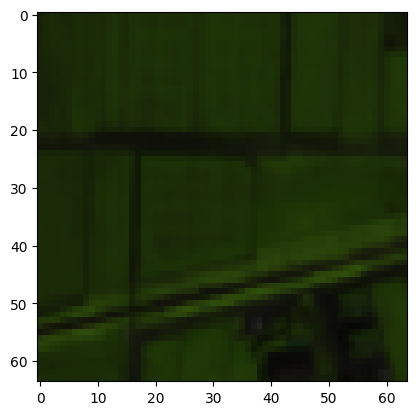

In [26]:
plt.imshow(data['gt'][:,:,[70,100,36]])


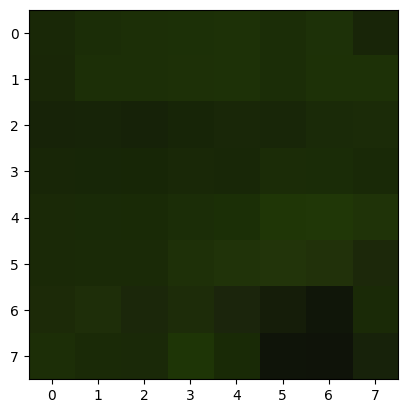

In [27]:
plt.imshow(data['ms'][:,:,[70,100,36]])

# Model Visualization

In [32]:
import torch
from SSPSR import SSPSR
from torch.utils.data import DataLoader
net = SSPSR(n_subs=8, n_ovls=2,n_colors=8,  n_blocks=3, n_feats=256, n_scale=8, res_scale=0.1)
net.load_state_dict(torch.load('model.pth'))
device = torch.device("cuda")
net.to(device).train()

SSPSR(
  (branch): BranchUnit(
    (head): Conv2d(8, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (body): SSPN(
      (net): Sequential(
        (0): SSB(
          (spa): ResBlock(
            (body): Sequential(
              (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (1): ReLU(inplace=True)
              (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            )
          )
          (spc): ResAttentionBlock(
            (body): Sequential(
              (0): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
              (1): ReLU(inplace=True)
              (2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
              (3): CALayer(
                (avg_pool): AdaptiveAvgPool2d(output_size=1)
                (conv_du): Sequential(
                  (0): Conv2d(256, 16, kernel_size=(1, 1), stride=(1, 1))
                  (1): ReLU(inplace=True)
                  (2): Conv2d(16, 256, ke

In [33]:
test_path3 = '/scratch/user/siddhanth.reddy/Capstone/Capstone_8/dataset/Chikusei_x8/Chikusei_test.mat'

In [38]:
test_set = HSTestData(image_dir=test_path3, colors = 8)
test_loader = DataLoader(test_set, batch_size=1, num_workers=8, shuffle=True)

torch.Size([1, 8, 512, 512])
torch.Size([1, 8, 512, 512])
torch.Size([1, 8, 64, 64])
Iteration


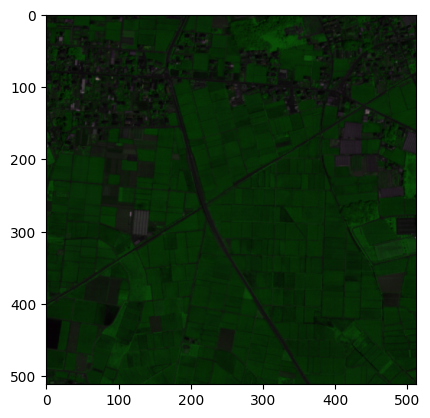

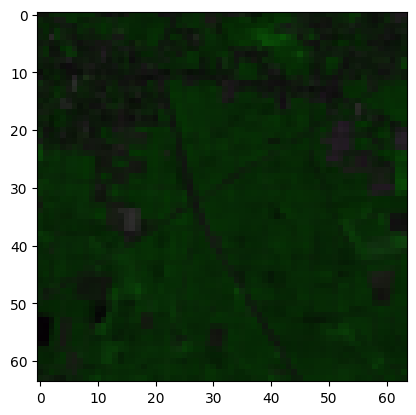

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


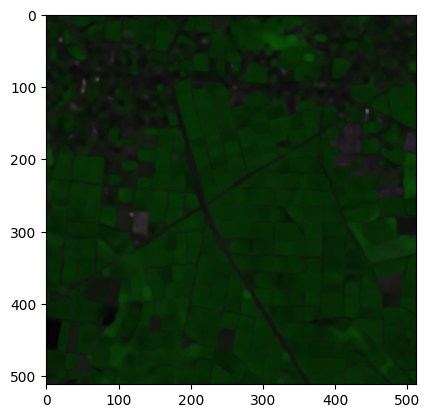

torch.Size([1, 8, 512, 512])
torch.Size([1, 8, 512, 512])
torch.Size([1, 8, 64, 64])
Iteration


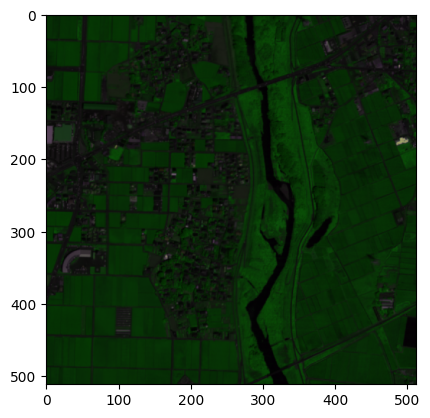

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


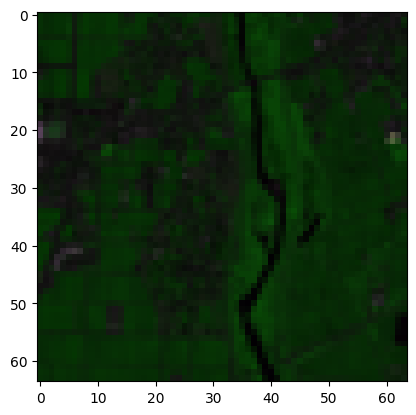

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


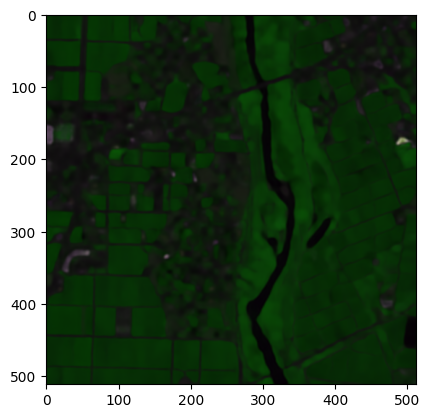

torch.Size([1, 8, 512, 512])
torch.Size([1, 8, 512, 512])
torch.Size([1, 8, 64, 64])
Iteration


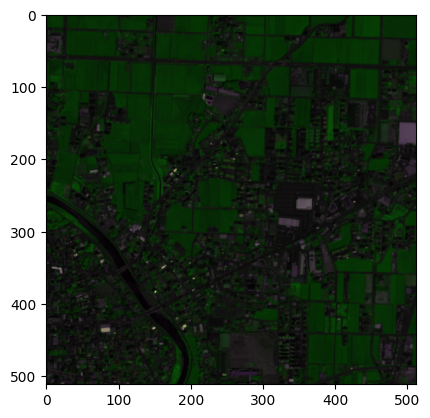

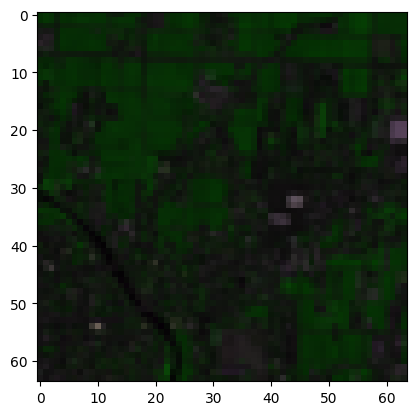

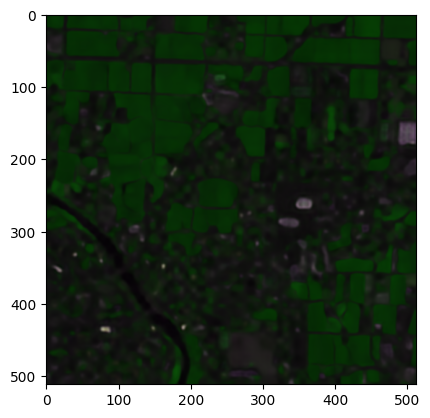

torch.Size([1, 8, 512, 512])
torch.Size([1, 8, 512, 512])
torch.Size([1, 8, 64, 64])
Iteration


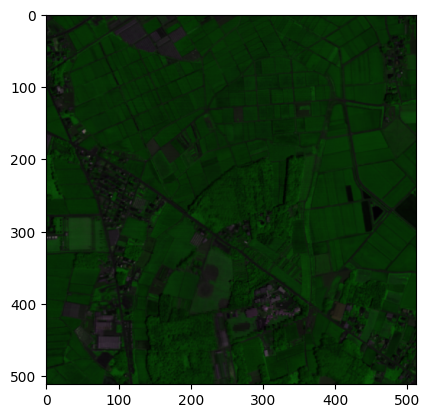

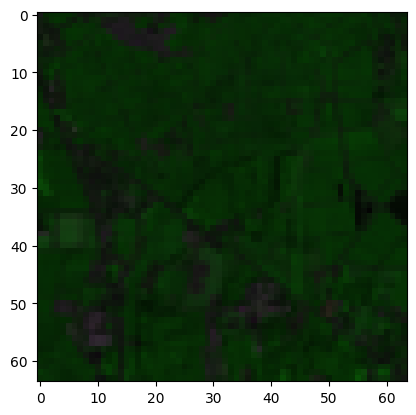

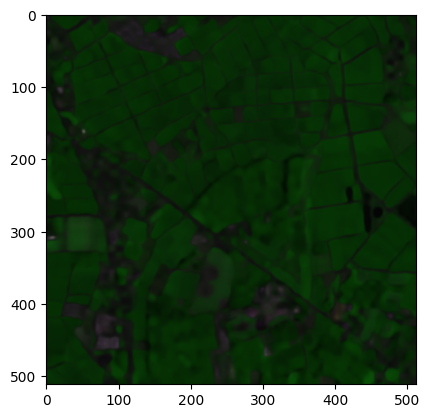

In [44]:
mat = [4, 7,3]
for iteration, (x, lms, gt) in enumerate(test_loader):
    x, lms, gt = x.to(device), lms.to(device), gt.to(device)
    y = net(x, lms)
    print(gt.shape)
    print(y.shape)
    print(x.shape)
    yn = y.view(512, 512, 8)
    xn = x.view(64, 64, 8)
    lmsn = lms.view(512, 512, 8)
    gtsn = gt.view(512, 512, 8)
    print("Iteration")
    plt.imshow(gt.squeeze().cpu().numpy().transpose(1, 2, 0)[:,:,mat])
    plt.show()
    plt.imshow(x.squeeze().cpu().numpy().transpose(1, 2, 0)[:,:,mat])
    plt.show()
    plt.imshow(y.detach().squeeze().cpu().numpy().transpose(1, 2, 0)[:,:,mat])
    plt.show()
    